In [131]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
import random #To pick random images to display
import math
from scipy.special import expit #Vectorized sigmoid function

In [132]:
digitData = "data/ex3data1.mat"
mat = scipy.io.loadmat(digitData)
# X is 5000 x 400 feature matrix where each row reprents an unrolled 20x20 image
X = mat['X']
# y is 5000 x 1 identifier matrix
y = mat['y']

# Insert row of 1's into X
# first param is the target matrix to insert into
# 0 is index 
# 1 is the value to insert
# axis = 1 inserts into rows and axis = 0 inserts into columns
# so now the first column in X is all 1s

X = np.insert(X, 0, 1,axis = 1)



In [133]:
def reshapeRow(row):
    """
    @param {row} 1 x 401 matrix since an image of a digit is 20x20 + 1 that was added as a bias
    Function that takes in the pixel intensity values and puts it into a 20x20 square 
    """ 
    # the [1:] is used to take everything after the 1st index 
    
    return row[1:].reshape(20,20).T

def displayData(indiciesToDisplay = None):
    """
    Function that selects 100 random examples for the 5000 we have and organizes
    them into a 10x10 matrix
    """
    width = 20
    height = 20
    numRows = 10
    numCols = 10
    
    if not indiciesToDisplay:
        indiciesToDisplay = random.sample(range(X.shape[0]), numRows * numCols)

    
    bigPicture = np.zeros((height * numRows, width * numCols))
    
    iRow = 0
    iCol = 0

    for i in indiciesToDisplay :
        if iCol == numCols:
            iCol = 0
            iRow += 1
 
        curImg = reshapeRow(X[i])
        bigPicture[iRow * height :iRow * height + curImg.shape[0], 
                    iCol * width : iCol * width + curImg.shape[1]] = curImg
        iCol += 1 
    fig = plt.figure( figsize = (6,6) )
    img = scipy.misc.toimage( bigPicture )
    plt.imshow(img,cmap = cm.Greys_r)
    
        
    
    


c:\users\ammar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


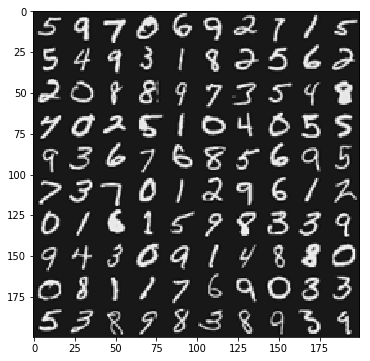

In [134]:
displayData()

In [135]:
def hypothesis(theta, X):
    return sigmoid(np.matmul(X,theta))

def sigmoid(z):
    return 1/(1 + math.exp(-z))

def costFunction(theta, X, y, lmbda = 0):
    m = X.shape[0]    
    hypo = hypothesis(X,theta)
    temp1 = np.log(hypo).dot(y.T)
    temp2 - np.log(hypo).dot((1-y).T)                  
    J = (-1/m) (temp1+temp2)  + (lmbda/2*m) * theta.T.dot(theta)
    return J

def gradFunction(theta, X, y, lmbda = 0):
    temp = hypothesis(X,theta)
    error = temp - y.T
    grad = (1/m)*np.dot(X.T,error) + (lmbda/m)*theta
    return grad

In [136]:
from scipy import optimize
def optimizeTheta(theta, X, y, lmbda = 0):
    """
    
    """
    J,grad = costFunction(theta,X,y,lmbda)
    rc = optimize.fmin_cg(costFunction, gradFunction, x0 = theta, 
                          args = (X, y ,lmbda), maxiter=50, disp=False,
                          full_output = True)
    return rc[0], rc[1]

In [139]:
def createTheta():
    """
    Creates an optimized theta for each of the 10 classes
    """
    lmbda = 0 
    # need 400 thetas since there are 400 features
    # X.shape[1] = 400
    # iTheta = 401 x 1
    iTheta = np.zeros((X.shape[1],1)).reshape(-1)
    # Theta = 10 x 401
    Theta = np.zeros(10,X.shape[1])
    curClass = 0
    for i in range(10)
        if (i != 0):
            curClass = i
        else: 
            curClass = 10
    yClass = np.array
            
            


(401,)
